# Titanic Machine Learning From Disaster

<img src="titanic.jpg" style="width: 500px;">

## Problem Statement
Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck or not.


## Dataset
1). <b>train.csv:-</b> training dataset, contains all attributes required to make a predictive model along with the outcome attribute i.e. "ground truth".

2). <b>test.csv:-</b> testing dataset, contains all attributes except outcome.

3). <b>gender_submission.csv:-</b> a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

## Attributes Dictionary

<b>PassengerID:-</b> Unique Id's of passenger

<b>Survived:-</b> Target column <br>
1 = Survived <br>
0 = Not Survived.

<b>Pclass:</b> Ticket Class<br>
1 = Upper class <br>
2 = Middle class <br>
3 = Lower class

<b>Name:-</b> Name of passenger.
 
<b>Sex:-</b> Sex of passenger.

<b>Age:-</b> Age of passenger in years.

<b>Sibsp:-</b> The dataset defines family relations in this way. <br>
Sibling = brother, sister, stepbrother, stepsister <br>
Spouse = husband, wife (mistresses and fiancés were ignored)

<b>Parch:-</b> The dataset defines family relations in this way. <br>
Parent = mother, father <br>
Child = daughter, son, stepdaughter, stepson <br>
Some children travelled only with a nanny, therefore parch=0 for them.

<b>Ticket:-</b> Ticket number of passenger.

<b>Fare:-</b> Passenger Fare.

<b>Cabin:-</b> Cabin Number.

<b>Embarked:-</b> Port of Embarkation(port on which passenger started journey). <br>
C = Cherbourg <br>
Q = Queenstown <br>
S = Southampton.

## Import Packages ..

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
def warns(*args,**kwargs):
    pass
warnings.warn=warns

## Data loading ..

In [2]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")
g_s=pd.read_csv("gender_submission.csv")
passengerSurvived=train[train.Survived==1]
Id_test=test["PassengerId"]
print("# train.csv =>")
train.head()

# train.csv =>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("# test.csv =>")
test.head()

# test.csv =>


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Section-1). Analyzing the Data

In [4]:
print("Shape of train.csv :- ",train.shape)
print("Shape of test.csv :- ",test.shape)
print("Shape of gender_submission.csv :- ",g_s.shape)

Shape of train.csv :-  (891, 12)
Shape of test.csv :-  (418, 11)
Shape of gender_submission.csv :-  (418, 2)


In [5]:
# Info of each column
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### Observation_1 :-
1). Titanic had 2224 passengers and crew .                                                
Our train data has 891 rows (i.e. data of 891 passengers ) and 12 columns ( their information ) and test data has 418 rows and 11 columns.

2). Age, Embarked and Cabin column has null/missing values.

In [6]:
# description for numerical datatype features
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Value count in Target Column.
print(train.Survived.value_counts())

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

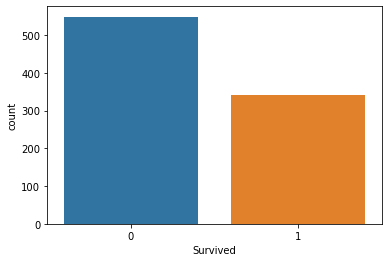

In [8]:
sns.countplot(train["Survived"])

In [9]:
# Count of unique categories in Pclass ..
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

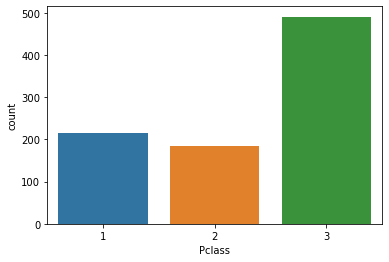

In [10]:
sns.countplot(train["Pclass"])

In [11]:
# Percent of people survived in different Passenger Class ..
print("Number of Passengers Survived in Pclass => \n",passengerSurvived[["Pclass","Survived"]].groupby("Pclass").count())
print("="*20)
print("Average of Passengers Survived in PClass => \n",train[["Pclass","Survived"]].groupby("Pclass").mean())

Number of Passengers Survived in Pclass => 
         Survived
Pclass          
1            136
2             87
3            119
Average of Passengers Survived in PClass => 
         Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

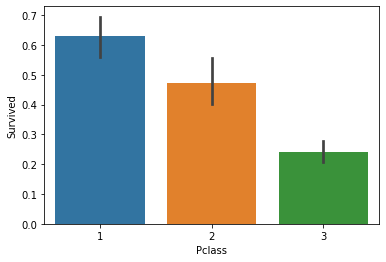

In [12]:
sns.barplot(train["Pclass"],train["Survived"])

In [13]:
# Average Fare of Passenger Class ..
train[["Pclass","Fare"]].groupby("Pclass").mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

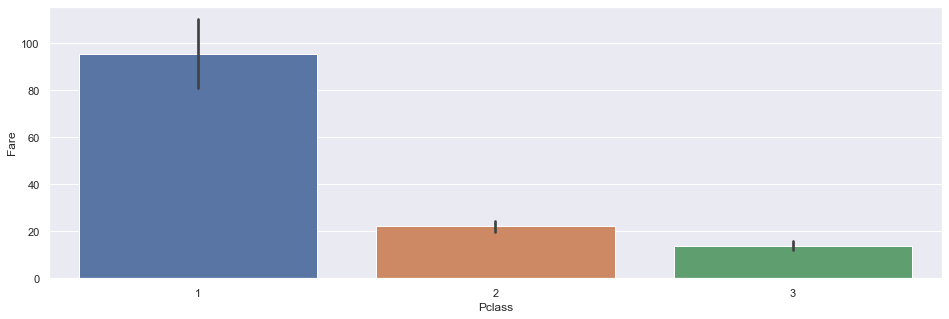

In [14]:
sns.set(rc={'figure.figsize':(16,5)})
passengerSurvived=train[train.Survived==1]
sns.barplot(x="Pclass",y="Fare",data=passengerSurvived)

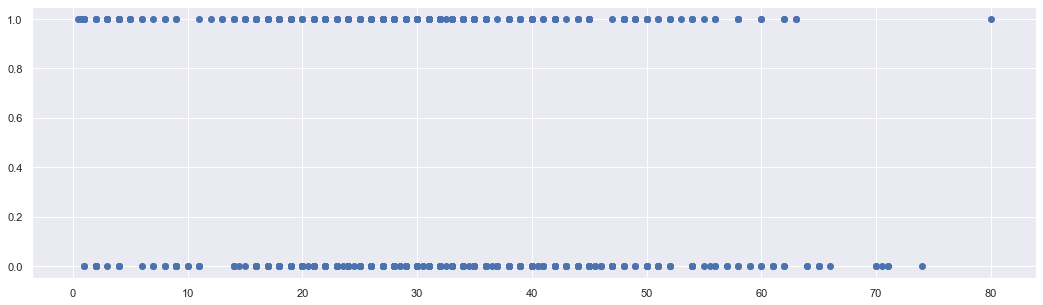

In [15]:
# Check the Survival of different Age groups..
plt.figure(figsize=[18,5])
plt.scatter(x="Age",y="Survived",data=train)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

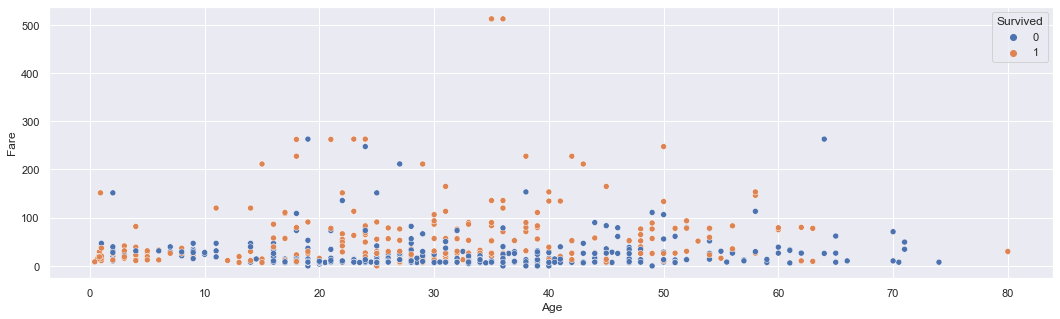

In [16]:
# Check the Survival of Fare..
plt.figure(figsize=[18,5])
sns.scatterplot(x='Age',y='Fare',hue='Survived',data=train)

In [17]:
# Count of unique categories in SibSp ..
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [18]:
# Count of unique categories in SibSp ..
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Text(0, 0.5, 'Survived')

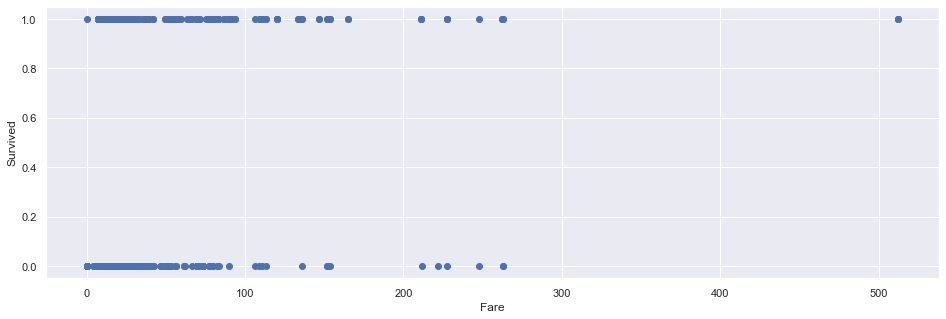

In [19]:
# Survival on basis of Fair..
plt.figure(figsize=[16,5])
plt.scatter(x="Fare",y="Survived",data=train)
plt.xlabel("Fare")
plt.ylabel("Survived")

### Observation_2 ->
1). PassengerId has all unique values -> so it can be removed.                            
2). The <b>survival rate</b> in our data <b>is 38%</b> which was 32% in titanic tragedy.                              
3). Most of the people were in 3rd Passenger Class. <br>
4). <b>63%</b> people <b>survived in Pclass 1</b>, 47% in Pclass 2, 24% in Pclass 3.                                           
5). The <b>average Fare of Pclass 1 is 84</b>, Pclass 2 is 20.6 and Pclass 3 is 13.6. <br>
6). No clear cluster to say which Age group surives the most. <br>
7). The highest aged person was 80 years old. <br>
8). Most of the passengers had no Siblings/Spouse and Parent-Child relation. <br>
9). Hightest Fare was 512.

#### Insights ->
1). The Fare of upper and lower class varies too much, thus most number of passengers in 3rd Passenger_class.

In [20]:
# for object datatype features
train.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ford, Miss. Doolina Margaret ""Daisy""",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [21]:
# Name Column..
train["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [22]:
# Sex Column..
passengerSurvived.Sex.value_counts()

female    233
male      109
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

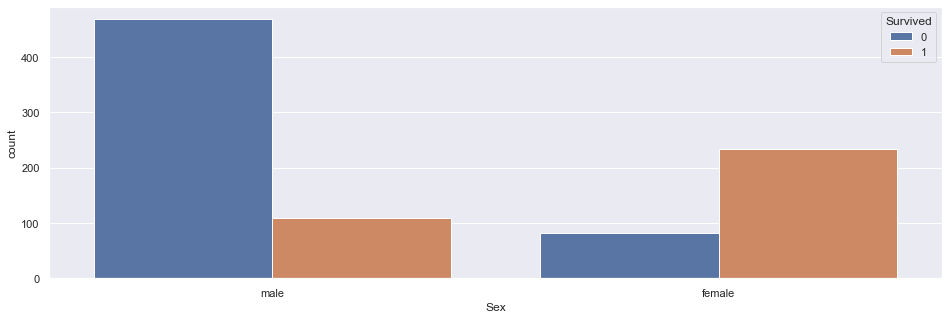

In [23]:
sns.countplot(x="Sex",hue="Survived",data=train)

In [24]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
print("Mean Fare of Embarked ports => \n",train[["Embarked","Fare"]].groupby(["Embarked"]).mean())

Mean Fare of Embarked ports => 
                Fare
Embarked           
C         59.954144
Q         13.276030
S         27.079812


In [26]:
print("Mean Survival Rate of Embarked ports => \n",train[["Embarked","Survived"]].groupby(["Embarked"]).mean())

Mean Survival Rate of Embarked ports => 
           Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957


### Observations_3 ->
1). Name contains all unique values , therefore cannot contribute much too our model thus can be removed.  </br>             
2). We can <b>extract a new feature from name</b> which contains tittle of name (like - mrs. ,mr. ,dr. , etc.). </br>           
3). 577 are men out of 891 (i.e. There were 65 % of men on the ship ), but survival rate of female was more than men. </br>                                          
4). Ticket has large percentage of unique values , therfore can be removed (as contains many unique values).  </br>             
5). Cabin has lots of missing values , therefore can be removed from our data.  </br>                         
6). There were 3 Embarked ports where S was the most frequent one. <br>

#### Insights ->
1). As Fare for port C is highest, it can be said that C was the first port in path or most of the passenger in Pclass 1 embarked from port C.

## Section-2). EDA and Preprocessing of Data ..

### Missing Value Imputation ->
From Observation 1, we are going to impute the missing values in Age and Embarked Column.

#### Training data.

<AxesSubplot:>

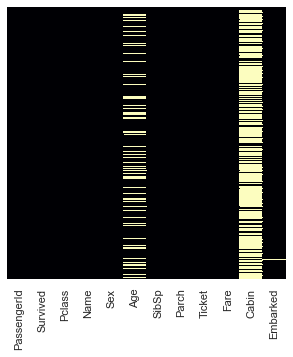

In [27]:
plt.figure(figsize=(5,5))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [28]:
print("Age =>  \n","Number of missing values => ",train.Age.isnull().sum())
print(" Percentage of missing values => ",(train.Age.isnull().sum()/891)*100)

Age =>  
 Number of missing values =>  177
 Percentage of missing values =>  19.865319865319865


In [29]:
# As 20% of values are missing, it can be replaced with the mean of Age column.
train.Age.fillna(train.Age.mean(),inplace=True)
train.Age.isnull().all()

False

In [30]:
print("Embarked => \n","Number of missing values => ",train.Embarked.isnull().sum())

Embarked => 
 Number of missing values =>  2


In [31]:
# As only 2 values are missing, it can be replaced with the mode of Embarked column.
train.Embarked=np.where(train.Embarked.isnull(),train.Embarked.mode(),train.Embarked)
train.Embarked.isnull().all()

False

#### Testing data.

<AxesSubplot:>

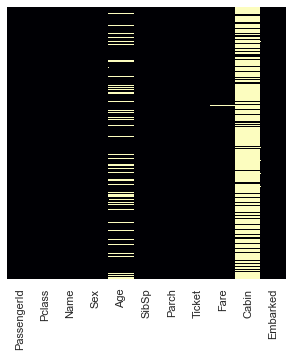

In [32]:
plt.figure(figsize=(5,5))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [33]:
print("Age =>  \n","Number of missing values => ",test.Age.isnull().sum())
print(" Percentage of missing values => ",(test.Age.isnull().sum()/891)*100)

Age =>  
 Number of missing values =>  86
 Percentage of missing values =>  9.652076318742985


In [34]:
test.Age.fillna(train.Age.mean(),inplace=True)
test.Age.isnull().all()

False

In [35]:
print("Fare => \n","Number of missing values => ",test.Fare.isnull().sum())

Fare => 
 Number of missing values =>  1


In [36]:
test.Fare.fillna(test.Fare.mean(),inplace=True)
test.Fare.isnull().all()

False

### Removing insignificant features ->
From observation 2 and 3, Ticket and Cabin column can be removed.

In [37]:
train_new=train.drop(["PassengerId","Cabin","Ticket"],axis=1)
train_new.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [38]:
test_df=test.drop(["PassengerId","Cabin","Ticket"],axis=1)
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

### Encoding the Categorical Features ->
As observed from above Sex column has 2 categories and Embarked Column has 3.

### Training Data..

In [39]:
train_new.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [40]:
# encode Sex column
train_new["Sex"]=np.where(train_new["Sex"]=="male",1,0)
# encode Embarked column
train_new["Embarked"]=train_new["Embarked"].replace({"S":1,"C":2,"Q":3})

In [41]:
# Check the datatype of encoded dataframe..
train_new.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1


### Testing Data ..

In [42]:
test_df["Sex"]=np.where(test_df["Sex"]=="male",1,0)
# encode Embarked column
test_df["Embarked"]=test_df["Embarked"].replace({"S":1,"C":2,"Q":3})

In [43]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,3
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,1
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,3
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,1


### Feature Extraction ->
As mentioned in Observation_3, we can extract new feature from name column.

#### Training Data ..

In [44]:
train_new["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [45]:
ls=[]
for row in train_new.Name:
    start_index=row.find(", ")
    end_index=row.find(".")
    ls.append(row[start_index+1:end_index])
print("length of list => ",len(ls))
print("\nList =>\n",ls[:35])

length of list =>  891

List =>
 [' Mr', ' Mrs', ' Miss', ' Mrs', ' Mr', ' Mr', ' Mr', ' Master', ' Mrs', ' Mrs', ' Miss', ' Miss', ' Mr', ' Mr', ' Miss', ' Mrs', ' Master', ' Mr', ' Mrs', ' Mrs', ' Mr', ' Mr', ' Miss', ' Mr', ' Miss', ' Mrs', ' Mr', ' Mr', ' Miss', ' Mr', ' Don', ' Mrs', ' Miss', ' Mr', ' Mr']


In [46]:
train_new['NameTitle'] = pd.Series(ls)
train_new.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,Mr


In [47]:
# Concating Name Titles having less value count to a single category..
train_new['NameTitle'] = train_new['NameTitle'].replace([[' Dr',' Rev',' Mlle', ' Col', ' Major',
                                       ' Sir',' Ms', ' the Countess',' Lady',' Mme', ' Jonkheer',' Capt',' Don']],' Other')

In [48]:
train_new.NameTitle.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Other'], dtype=object)

In [49]:
train_new.NameTitle.value_counts()

 Mr        517
 Miss      182
 Mrs       125
 Master     40
 Other      27
Name: NameTitle, dtype: int64

<AxesSubplot:xlabel='NameTitle', ylabel='count'>

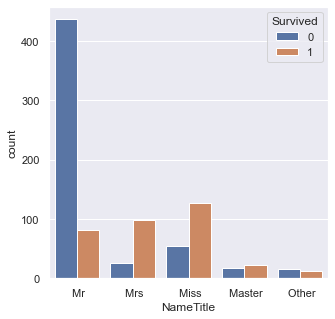

In [50]:
plt.figure(figsize=(5,5))
sns.countplot(x="NameTitle",hue="Survived",data=train_new)

In [51]:
# Survival Rate of each category..
train_new[["NameTitle","Survived"]].groupby("NameTitle").mean()

,Survived
NameTitle,
Master,0.575000
Miss,0.697802
Mr,0.156673
Mrs,0.792000
Other,0.444444


#### Observation ->
This confirm the fact that female survived the most, as Miss has highest survival rate.

In [52]:
# Convert Catergorical to Numerical datatype..
train_new["NameTitle"].replace({" Mr":1," Miss":2," Mrs":3," Master":4," Other":5},inplace=True)
train_new.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,3
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,3
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,1


In [53]:
# Removing Name column from datafrane..
train_df=train_new.drop(["Name"],axis=1)
print("# Dimensions Of Data => ",train_df.shape)
train_df.head()

# Dimensions Of Data =>  (891, 9)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,0,3,1,22.0,1,0,7.2500,1,1
1,1,1,0,38.0,1,0,71.2833,2,3
2,1,3,0,26.0,0,0,7.9250,1,2
3,1,1,0,35.0,1,0,53.1000,1,3
4,0,3,1,35.0,0,0,8.0500,1,1


#### Testing Data...

Coverting for test aswell, for fitting it into our model.

In [54]:
ls=[]
for row in test_df.Name:
    start_index=row.find(", ")
    end_index=row.find(".")
    ls.append(row[start_index+1:end_index])
print("length of list => ",len(ls))
print("\nList =>\n",ls)

length of list =>  418

List =>
 [' Mr', ' Mrs', ' Mr', ' Mr', ' Mrs', ' Mr', ' Miss', ' Mr', ' Mrs', ' Mr', ' Mr', ' Mr', ' Mrs', ' Mr', ' Mrs', ' Mrs', ' Mr', ' Mr', ' Miss', ' Mrs', ' Mr', ' Master', ' Mrs', ' Mr', ' Mrs', ' Mr', ' Miss', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mrs', ' Mrs', ' Mr', ' Mr', ' Miss', ' Miss', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mrs', ' Mrs', ' Mr', ' Mr', ' Mr', ' Mrs', ' Mrs', ' Mr', ' Mr', ' Miss', ' Miss', ' Mr', ' Master', ' Mr', ' Mr', ' Mr', ' Miss', ' Mr', ' Mr', ' Mr', ' Miss', ' Master', ' Mrs', ' Miss', ' Mr', ' Mr', ' Mrs', ' Miss', ' Mr', ' Miss', ' Mr', ' Miss', ' Mr', ' Mr', ' Mrs', ' Mr', ' Miss', ' Master', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Miss', ' Miss', ' Ms', ' Master', ' Mrs', ' Mr', ' Mrs', ' Mr', ' Mr', ' Mr', ' Mrs', ' Mr', ' Miss', ' Mr', ' Mrs', ' Mr', ' Mr', ' Mr', ' Mrs', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Miss', ' Miss', ' Miss', ' Mrs', ' Mr', ' Mr', ' Miss', ' Mr', ' Mrs', ' Miss', ' Mr', ' Mrs', ' Mr', ' Mr', '

In [55]:
test_df['NameTitle'] = pd.Series(ls)
# Concating Name Titles having less value count to a single category..
test_df['NameTitle'] = test_df['NameTitle'].replace([[' Dr',' Rev',' Mlle', ' Col', ' Major',
                                       ' Sir',' Ms', ' the Countess',' Lady',' Mme', ' Jonkheer',' Capt',' Don',' Dona']],' Other')

In [56]:
# Dropping Name Column..
test_df.drop(["Name"],axis=1,inplace=True)
# Convert Catergorical to Numerical datatype..
test_df["NameTitle"].replace({" Mr":1," Miss":2," Mrs":3," Master":4," Other":5},inplace=True)
test_df.NameTitle.value_counts()

1    240
2     78
3     72
4     21
5      7
Name: NameTitle, dtype: int64

### Check Data Distribution Of Each Feature ->

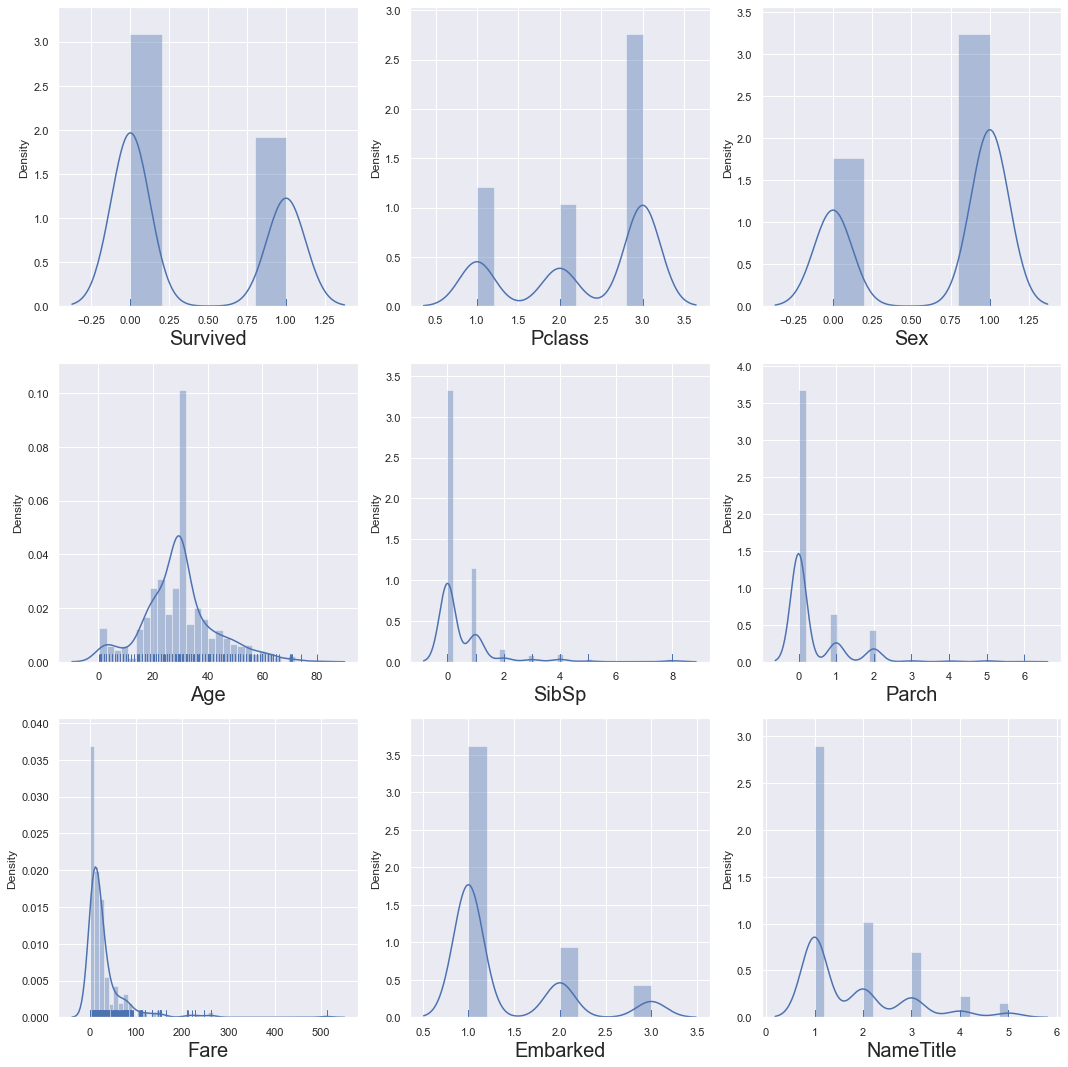

In [57]:
# let's see how data is distributed for every column
from scipy.stats import norm
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in train_df: 
    if plotnumber<=len(train_df.columns):
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(train_df[column],rug=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Observation ->
The Age and Fare cannot be zero as seen in the distplot. Let's deal with it.

In [58]:
# Age column..
print("Passengers with age less than 1 => ")
train_df[train_df.Age<1]

Passengers with age less than 1 => 


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
78,1,2,1,0.83,0,2,29.0000,1,4
305,1,1,1,0.92,1,2,151.5500,1,4
469,1,3,0,0.75,2,1,19.2583,2,2
644,1,3,0,0.75,2,1,19.2583,2,2
755,1,2,1,0.67,1,1,14.5000,1,4
803,1,3,1,0.42,0,1,8.5167,2,4
831,1,2,1,0.83,1,1,18.7500,1,4


In [59]:
# if Age is less than 1 like 0.24 -> make it one, if not less than 1 => round off..
for index,value in enumerate(train_df.Age):
    if value<1:
        train_df.Age[index]=1      
    else:
        train_df.Age[index]=round(value)

# Change datatype float to int..
train_df.Age=train_df.Age.astype('int64')

In [133]:
print("Passengers with age less than 1 => ",len(train_df[train_df.Age<1]))

Passengers with age less than 1 =>  0


In [134]:
# Fare Column..
print("Number of Passenger with Zero Fare => ",len(train_df[train_df.Fare==0]))

Number of Passenger with Zero Fare =>  15


In [135]:
# As these are only 15 we can replace these with mean Fare..
train_df.Fare.replace(0,train_df.Fare.mean(),inplace=True)
print("Number of Passenger with Zero Fare => ",len(train_df[train_df.Fare==0]))

print("Passengers with age less than 1 => ",len(train_df[train_df.Age<1]))

Number of Passenger with Zero Fare =>  0


In [136]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,0,3,1,22,1,0,7.2500,1,1
1,1,1,0,38,1,0,71.2833,2,3
2,1,3,0,26,0,0,7.9250,1,2
3,1,1,0,35,1,0,53.1000,1,3
4,0,3,1,35,0,0,8.0500,1,1


### Removing the Skewness In the Train Data Col

In [60]:
train_df['Age']=np.log(train_df['Age']+1)
train_df['Fare']=np.log(train_df['Fare']+1)

<AxesSubplot:title={'center':'Log Age distribution'}, ylabel='Density'>

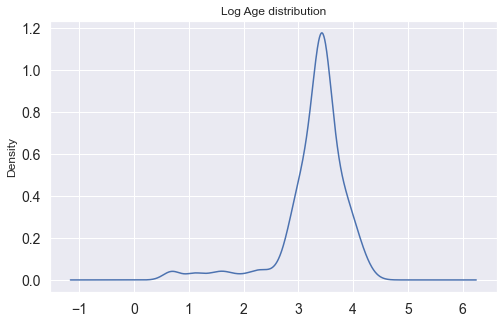

In [139]:
(train_df['Age']).plot(kind = 'density', title = 'Log Age distribution', fontsize=14, figsize=(8,5))

### Removing Skewness in Test Data ..

In [61]:
test_df['Age']=np.log(test_df['Age'])
test_df['Fare']=np.log(test_df['Fare']+1)

<AxesSubplot:title={'center':'Log Age distribution'}, ylabel='Density'>

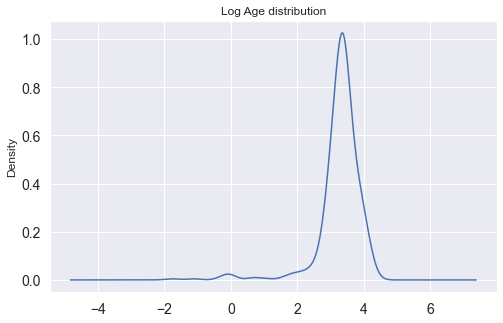

In [62]:
(test_df['Age']).plot(kind = 'density', title = 'Log Age distribution', fontsize=14, figsize=(8, 5))

### Correlation Checking..

<AxesSubplot:>

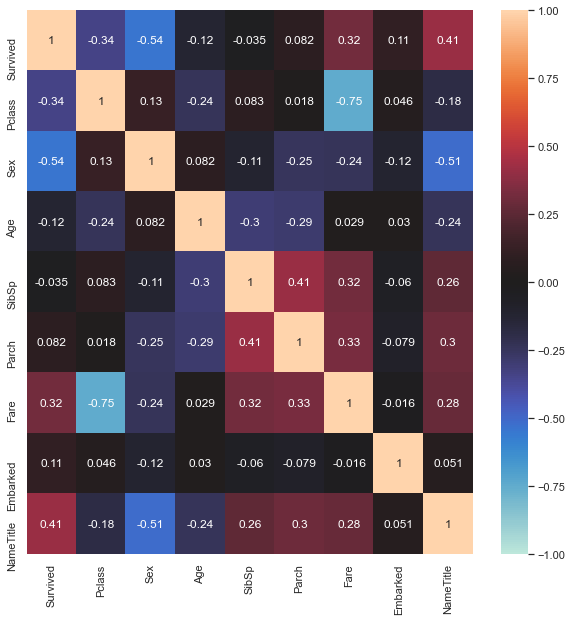

In [143]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(),annot=True,vmin=-1, vmax=1, center= 0)

=> As per the correlation heatmap -> SibSp and Parch are low correlated, this basically means if someone has child onboard, may have spouce onboard too, or if sibling then may have parent too. <br>
=> In overall low correlation (less than 0.5) is seen in some features but we can negelect it.

In [144]:
# Shifting target column at last ..
survived_col=train_df.pop("Survived")
train_df["Survived"]=survived_col 
train_df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle,Survived
0,3,1,3.135494,1,0,2.110213,1,1,0
1,1,0,3.663562,1,0,4.280593,2,3,1
2,3,0,3.295837,0,0,2.188856,1,2,1


### Split the features and Target column..

In [64]:
X = train_df.drop(['Survived'],axis=True)
y = train_df['Survived']

### Standardization..

In [65]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,3,1,3.135494,1,0,2.110213,1,1
1,1,0,3.663562,1,0,4.280593,2,3
2,3,0,3.295837,0,0,2.188856,1,2
3,1,0,3.583519,1,0,3.990834,1,3
4,3,1,3.583519,0,0,2.202765,1,1
...,...,...,...,...,...,...,...,...
886,2,1,3.332205,0,0,2.639057,1,5
887,1,0,2.995732,0,0,3.433987,1,2
888,3,0,3.433987,1,2,3.196630,1,2
889,1,1,3.295837,0,0,3.433987,2,1


In [66]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[ 8.27377244e-01,  7.37695132e-01, -2.60423929e-01, ...,
        -8.79740569e-01, -5.68837123e-01, -7.04469954e-01],
       [-1.56610693e+00, -1.35557354e+00,  6.03972122e-01, ...,
         1.36121993e+00,  1.00518113e+00,  1.19759892e+00],
       [ 8.27377244e-01, -1.35557354e+00,  2.04170605e-03, ...,
        -7.98539974e-01, -5.68837123e-01,  2.46564484e-01],
       ...,
       [ 8.27377244e-01, -1.35557354e+00,  2.28180643e-01, ...,
         2.42006638e-01, -5.68837123e-01,  2.46564484e-01],
       [-1.56610693e+00,  7.37695132e-01,  2.04170605e-03, ...,
         4.87082456e-01,  1.00518113e+00, -7.04469954e-01],
       [ 8.27377244e-01,  7.37695132e-01,  3.30520508e-01, ...,
        -8.18986581e-01,  2.57919938e+00, -7.04469954e-01]])

### Check Multicolinearity ..

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
#let's check the values
vif

,vif,Features
0,2.447578,Pclass
1,1.421147,Sex
2,1.256776,Age
3,1.513076,SibSp
4,1.465420,Parch
5,2.735630,Fare
6,1.050773,Embarked
7,1.565834,NameTitle


#### Observations ..
No value exceeds 5, therefore no collinearity found.

In [71]:
scaled_df=pd.DataFrame(X_scaled,columns=X.columns)
scaled_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,0.827377,0.737695,-0.260424,0.432793,-0.473674,-0.879741,-0.568837,-0.704470
1,-1.566107,-1.355574,0.603972,0.432793,-0.473674,1.361220,1.005181,1.197599
2,0.827377,-1.355574,0.002042,-0.474545,-0.473674,-0.798540,-0.568837,0.246564
3,-1.566107,-1.355574,0.472950,0.432793,-0.473674,1.062038,-0.568837,1.197599
4,0.827377,0.737695,0.472950,-0.474545,-0.473674,-0.784179,-0.568837,-0.704470


## Split the data in train and test

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(scaled_df,y,test_size=0.20,random_state=42)

## ..... MODEL SELECTION .....

## 1). Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [76]:
y_pred = log_reg.predict(x_test)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [79]:
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.7877094972067039

### Confusion Matrix

In [80]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[87, 18],
       [20, 54]], dtype=int64)

### Classification Report

In [81]:
predictions = log_reg.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



### Cross-Validation Score ..

In [82]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_scaled, y, cv=5)
scores

array([0.79888268, 0.80898876, 0.78089888, 0.80898876, 0.83146067])

In [83]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.81 accuracy with a standard deviation of 0.02


## 2). Decision Tree

In [93]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

In [94]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [95]:
clf.score(x_train,y_train)

0.9817415730337079

In [96]:
clf_pred = clf.predict(x_test)
clf.score(x_test,y_test)

0.7877094972067039

In [97]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']    
}

In [98]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5, n_jobs =-1)

In [99]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [100]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 5, 'splitter': 'random'}


In [101]:
grid_search.best_score_

0.841327686398109

In [102]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=10, min_samples_leaf=8, min_samples_split=5,splitter="random")
clf.fit(x_train,y_train)
# gini , 2 , 8 , random

DecisionTreeClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=5,
                       splitter='random')

In [103]:
clf.score(x_test,y_test)

0.8044692737430168

In [104]:
scores = cross_val_score(clf, X_scaled, y, cv=5)
scores

array([0.74860335, 0.82022472, 0.80898876, 0.76966292, 0.81460674])

In [105]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.03


In [107]:
predictions = clf.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [108]:
y_pred = clf.predict(x_test)

In [109]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[92, 13],
       [22, 52]], dtype=int64)

## 3). Random Forest..

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
rand_clf = RandomForestClassifier(random_state=6)

In [189]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=6)

In [190]:
rand_clf.score(x_test,y_test)

0.8379888268156425

In [196]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [197]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=6), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

In [198]:
#let's see the best parameters as per our grid search
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 90}

In [199]:
rand_clf = RandomForestClassifier(criterion="entropy",n_estimators=90, max_depth=7, min_samples_leaf=1,
                                  min_samples_split=3, max_features='log2')

In [200]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       min_samples_split=3, n_estimators=90)

In [202]:
rand_clf.score(x_test,y_test)

0.8268156424581006

In [203]:
scores = cross_val_score(rand_clf, X_scaled, y, cv=5)
scores

array([0.83798883, 0.81460674, 0.85393258, 0.80337079, 0.85955056])

In [204]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.83 accuracy with a standard deviation of 0.02


In [205]:
y_pred=rand_clf.predict(x_test)

In [206]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[93, 12],
       [19, 55]], dtype=int64)

In [207]:
predictions = rand_clf.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



## 4). SVM..

In [147]:
from sklearn.svm import SVC

In [169]:
svm_clf=SVC(random_state=0)
svm_clf.fit(x_train,y_train)
svm_clf.score(x_test,y_test)

0.8156424581005587

In [170]:
# Cross validation score
score_svm = cross_val_score(svm_clf, X_scaled, y, cv=5)
score_svm

array([0.84916201, 0.81460674, 0.83146067, 0.78651685, 0.87640449])

In [171]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score_svm.mean(), score_svm.std()))

0.83 accuracy with a standard deviation of 0.03


In [172]:
y_pred=svm_clf.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[94, 11],
       [22, 52]], dtype=int64)

In [173]:
predictions = svm_clf.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



## 5). Xg Boost Classifier..

In [208]:
from xgboost import XGBClassifier
model_7 = XGBClassifier()
model_7.fit(x_train,y_train)
pred = model_7.predict(x_test)
score_7 = accuracy_score(y_test,pred)
score_7

[21:09:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8268156424581006

In [209]:
predictions_7 = model_7.predict(x_test)
print(classification_report(y_test,predictions_7))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [176]:
score_xgb = cross_val_score(model_7, X_scaled, y, cv=5)
score_xgb

[17:46:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.82122905, 0.80337079, 0.85955056, 0.78651685, 0.82022472])

In [177]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score_xgb.mean(), score_xgb.std()))

0.82 accuracy with a standard deviation of 0.02


In [178]:
y_pred=model_7.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[91, 14],
       [17, 57]], dtype=int64)

In [179]:
grid_params =  {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
             "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
             "min_child_weight" : [ 1, 3, 5, 7 ],
             "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
             "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [181]:
grid=GridSearchCV(estimator=model_7,param_grid=grid_params,cv=5,n_jobs =-1,verbose = 3)

In [182]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

[18:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=12,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
        

In [183]:
grid.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 5}

In [184]:
xgb_clf=XGBClassifier(colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=5)
xgb_clf.fit(x_train,y_train)

[18:07:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [185]:
pred = xgb_clf.predict(x_test)
score_xgb = accuracy_score(y_test,pred)
score_xgb

0.8212290502793296

In [186]:
predictions = xgb_clf.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



In [158]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
331,-1.566107,0.737695,0.909396,-0.474545,-0.473674,0.435873,-0.568837,-0.704470
733,-0.369365,0.737695,-0.190758,-0.474545,-0.473674,-0.333698,-0.568837,-0.704470
382,0.827377,0.737695,0.330521,-0.474545,-0.473674,-0.798540,-0.568837,-0.704470
704,0.827377,0.737695,0.002042,0.432793,-0.473674,-0.806763,-0.568837,-0.704470
813,0.827377,-1.355574,-2.207660,3.154809,2.008933,0.528699,-0.568837,0.246564
...,...,...,...,...,...,...,...,...
106,0.827377,-1.355574,-0.333187,-0.474545,-0.473674,-0.830855,-0.568837,0.246564
270,-1.566107,0.737695,0.228181,-0.474545,-0.473674,0.519864,-0.568837,-0.704470
860,0.827377,0.737695,0.725280,1.340132,-0.473674,-0.255034,-0.568837,-0.704470
435,-1.566107,-1.355574,-0.960109,0.432793,2.008933,1.893172,-0.568837,0.246564


## Testing with Test_File

In [198]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
709,0.827377,0.737695,0.228181,0.432793,0.767630,-0.262287,1.005181,2.148633
439,-0.369365,0.737695,0.280150,-0.474545,-0.473674,-0.650570,-0.568837,-0.704470
840,0.827377,0.737695,-0.409336,-0.474545,-0.473674,-0.935460,-0.568837,-0.704470
720,-0.369365,-1.355574,-2.207660,-0.474545,0.767630,0.567719,-0.568837,0.246564
39,0.827377,-1.355574,-0.960109,0.432793,-0.473674,-0.580327,1.005181,0.246564


In [200]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,3,1,3.540959,0,0,2.178064,3,1
1,3,0,3.850148,1,0,2.079442,1,3
2,2,1,4.127134,0,0,2.369075,3,1
3,3,1,3.295837,0,0,2.268252,1,1
4,3,0,3.091042,1,1,2.586824,1,3


In [201]:
final_pred=rand_clf.predict(test_df)
output_df=pd.DataFrame(Id_test)
output_df["Survived"]=pd.DataFrame(final_pred)
output_df.Survived.value_counts()

0    414
1      4
Name: Survived, dtype: int64

In [202]:
g_s.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [203]:
final_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [495]:
filename = 'Titanic_rand_clf.csv'
output_df.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: Titanic_rand_clf.csv


## Final Note => 

RandomForest shows best performance results(f1 score and accuracy). <br>
Parameters in HyperParameter Tuning can be increased to get much better accuracy.<br>

Thank you... <br>
Any suggestions for improvement --? Always welcomed!